<h1>PLOTTING MOVIEDATA</h1>

<h2>Import Libraries</h2>

In [1]:
import pandas as pd
import numpy as np
import unicodedata
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import re

<h2>Read data</h2>

In [2]:
df = pd.read_csv('siivottu_leffadata.csv')
df[['Katsojat', 'Tulot']] = df[['Katsojat', 'Tulot']].astype(float)
df['Ensi'] = pd.to_datetime(df['Ensi'], format='%Y-%m-%d')
df['Pvm'] = pd.to_datetime(df['Pvm'], format='%Y-%m-%d')
df['Genre'] = df['Genre'].apply(eval)

<h3>Summed viewership as a function of release month</h3>

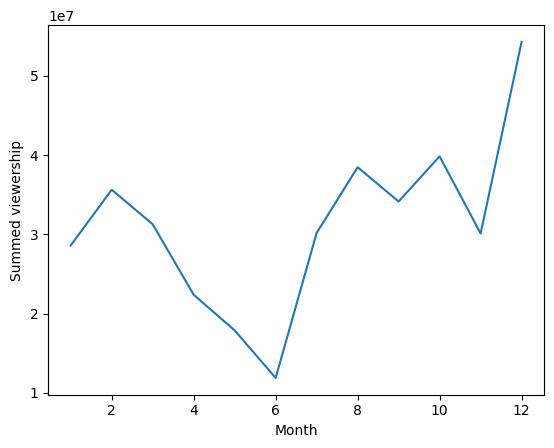

In [3]:
summat = []

for i in range(1,13):
    summat.append(df.loc[df['Pvm'].apply(lambda x: x.month) == i, 'Katsojat'].sum()) 

plt.plot(range(1,13), summat)
plt.xlabel('Month')
plt.ylabel('Summed viewership')

plt.savefig('katsojasumma.png')
plt.show()


<h3>Summed viewership as a function of genre for different seasons</h3>



Seasons: NY=new years eve (26.12-8.1), VD=valentine's day (7-21.2), MD=may day vappu (28.4-4.5), MS=midsummer (14-30.6), BS=back to school (1-15.9), HL=halloween (1-31.10), BF=black friday (21-30.11), ID=idependence day (1-11.12), CH=christmas (1-25.12).  

First, let's manipultae the 'Genre' column into boolean columns.

In [4]:
genres = ['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War','Western']
seasons = ['NY', 'VD', 'MD', 'MS', 'BS', 'HL', 'BF', 'ID', 'CH']

bool_dict = {}
for i in genres:
    bool_dict[i] = df['Genre'].apply(lambda x: 1 if i in x else 0)
bool_df = pd.DataFrame(bool_dict)
df = pd.merge(df, bool_df, left_index = True, right_index=True, suffixes=('',''))
df.head()


,Suom,Nimi,Katsojat,Tulot,Ensi,Tuotantomaa,Genre,IMDb ID ja linkki,Pvm,Season,...,Musical,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,Titanic,Titanic,1114954.0,7728955.71,1998-01-16,US,"[Drama, Romance]",tt0120338,2000-01-16,NaN,...,0,0,0,1,0,0,0,0,0,0
1,Tuntematon sotilas,Tuntematon sotilas,1023514.0,14190080.11,2017-10-27,FI,"[Drama, War]",tt4065552,2000-10-27,HL,...,0,0,0,0,0,0,0,0,1,0
2,Yksi lensi yli käenpesän,One Flew Over the Cuckoo's Nest,821805.0,52911.18,1976-03-19,US,[Drama],tt0073486,2000-03-19,NaN,...,0,0,0,0,0,0,0,0,0,0
3,Papillon,Papillon,759301.0,12076.74,1974-01-25,US,"[Biography, Crime, Drama]",tt0070511,2000-01-25,NaN,...,0,0,0,0,0,0,0,0,0,0
4,Uuno Turhapuro armeijan leivissä,Uuno Turhapuro armeijan leivissä,750965.0,NaN,1984-08-31,FI,[Comedy],tt0088336,2000-08-31,NaN,...,0,0,0,0,0,0,0,0,0,0


Then we can start analysing.

/tmp/ipykernel_21902/2732863982.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(genres, rotation=60)
/tmp/ipykernel_21902/2732863982.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(range(0,6000000,500000))
/tmp/ipykernel_21902/2732863982.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(genres, rotation=60)
/tmp/ipykernel_21902/2732863982.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(genres, rotation=60)
/tmp/ipykernel_21902/2732863982.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(range(0,6000000,500000))
/tmp/ipykernel_21902/2732863982.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(genres, rotation=60)
/tmp/ipykernel_21902/2732863982.py:22: UserWar

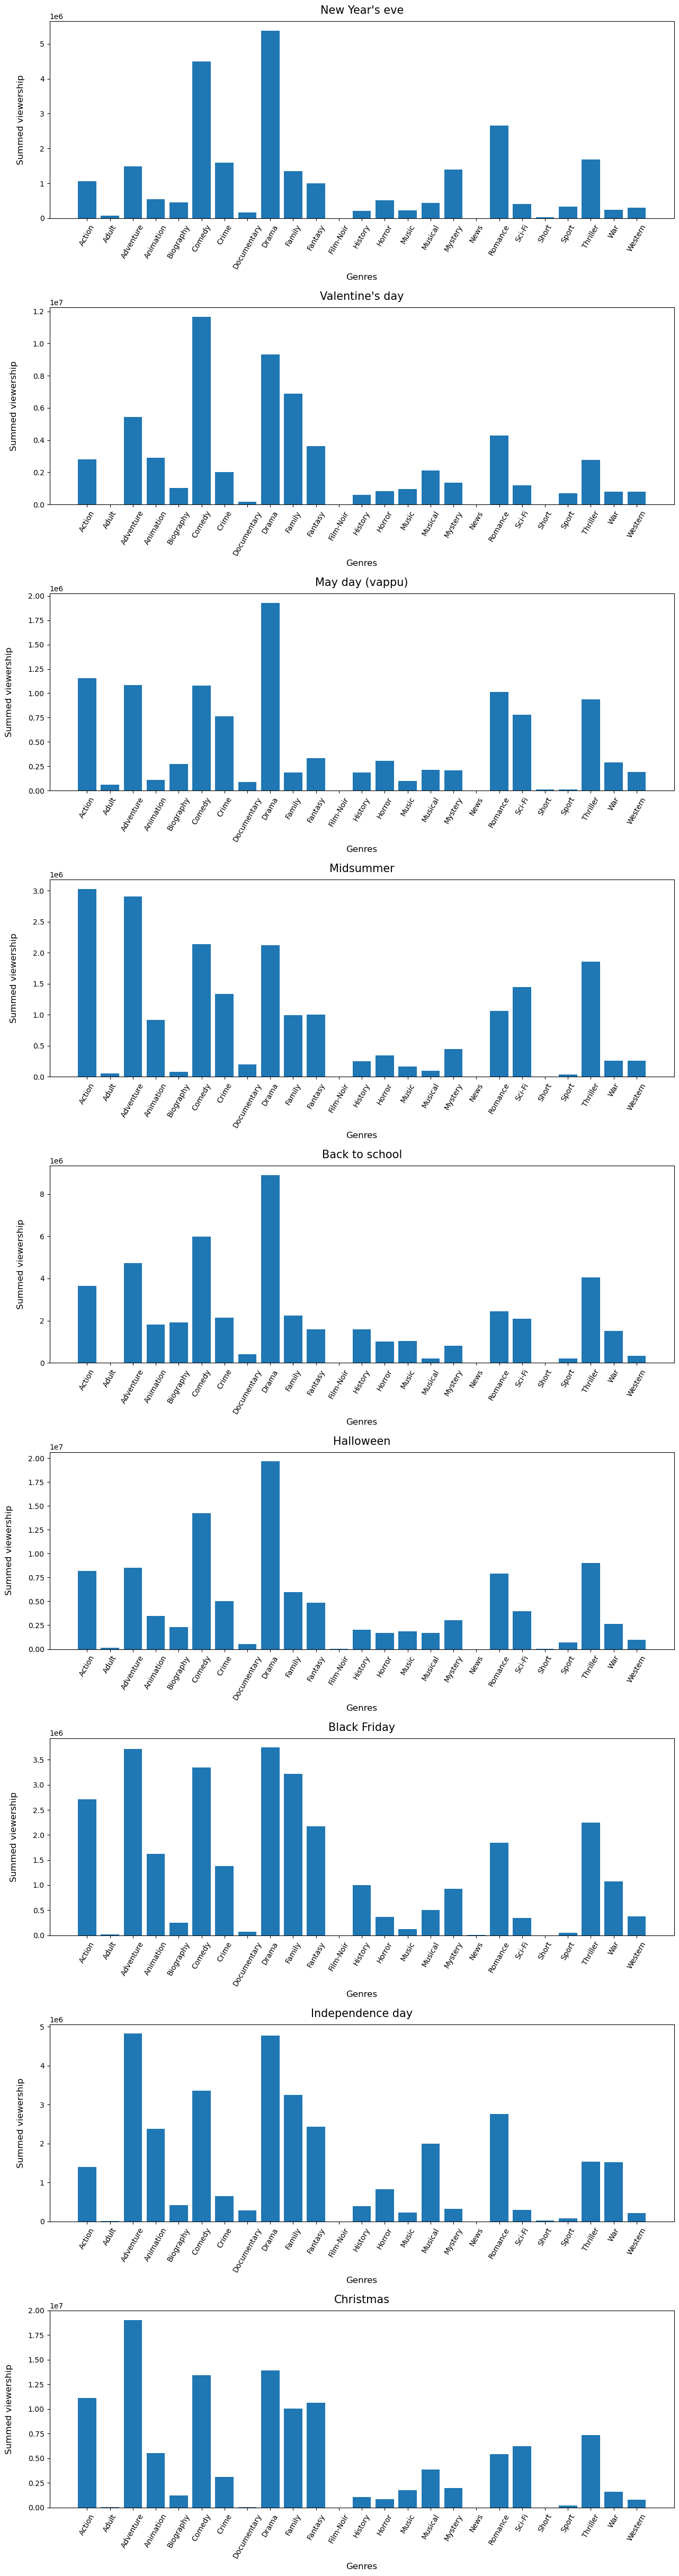

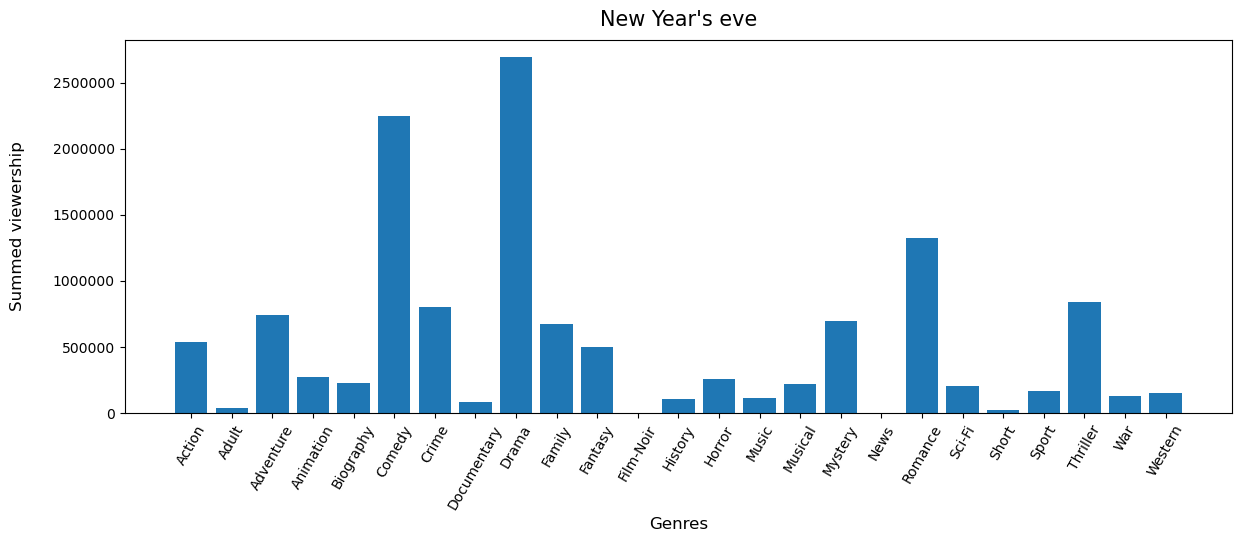

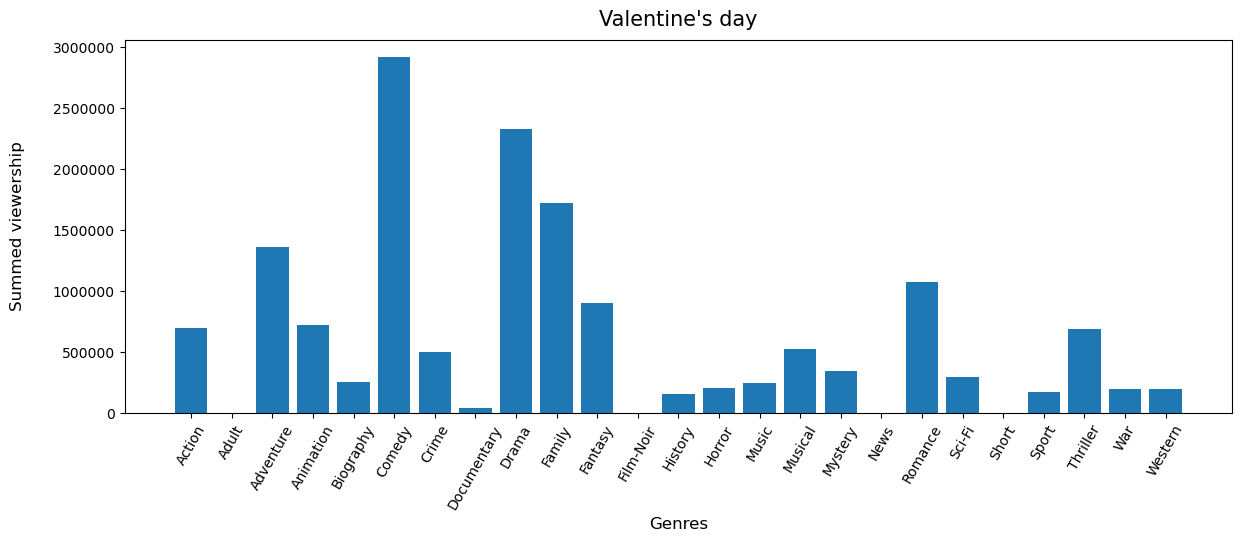

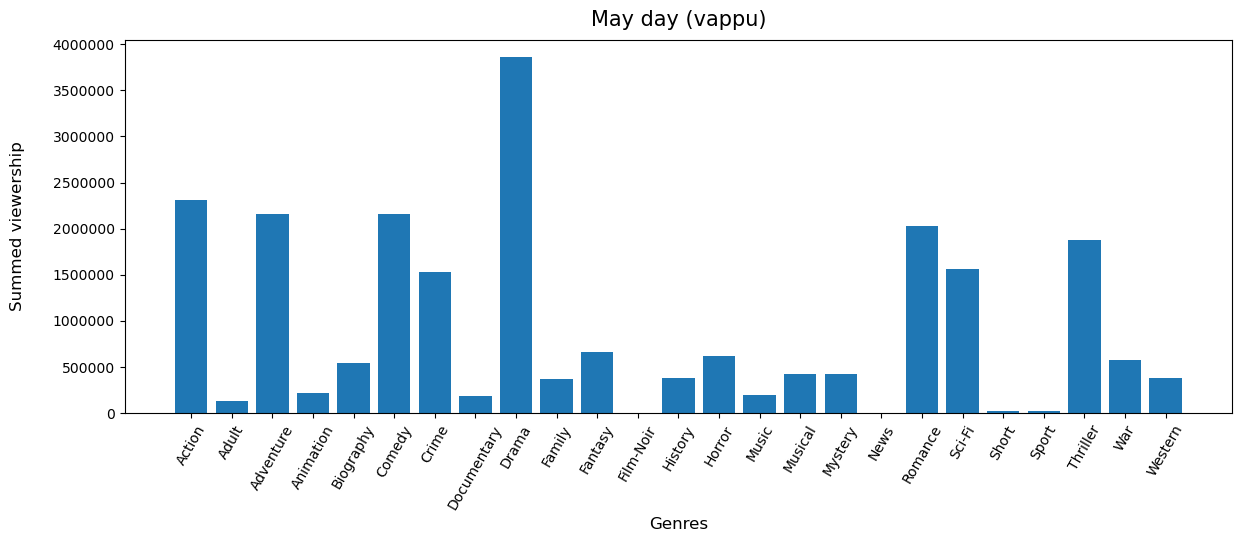

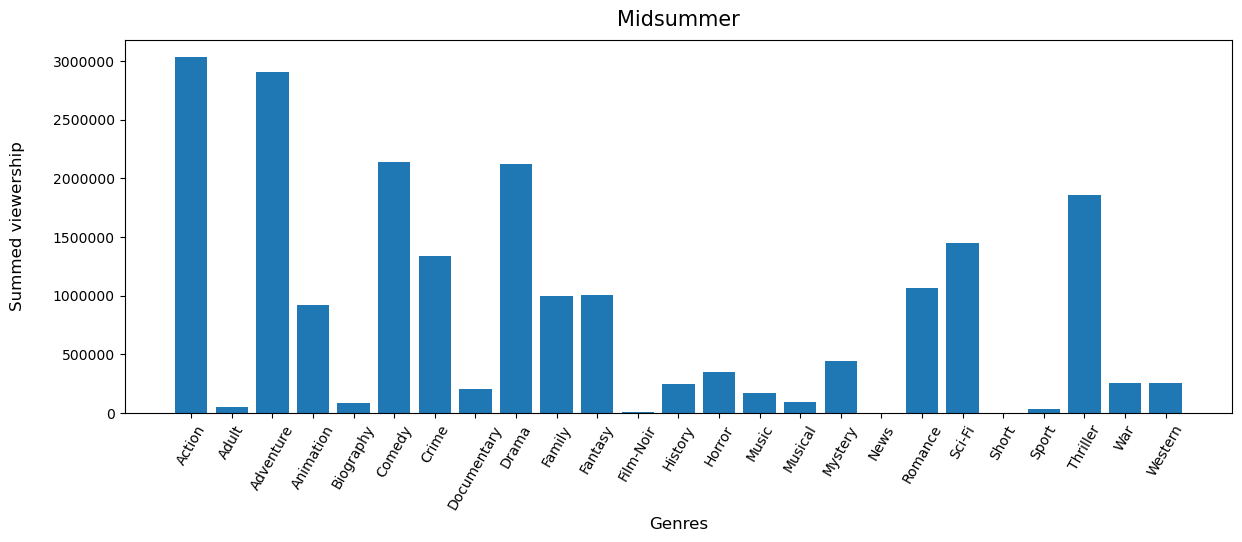

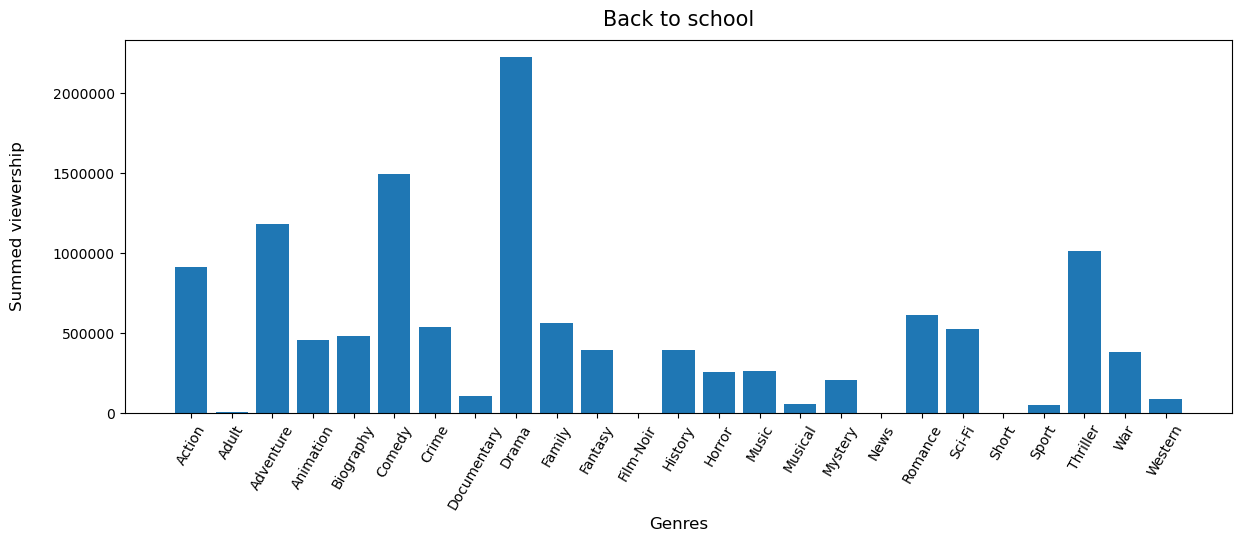

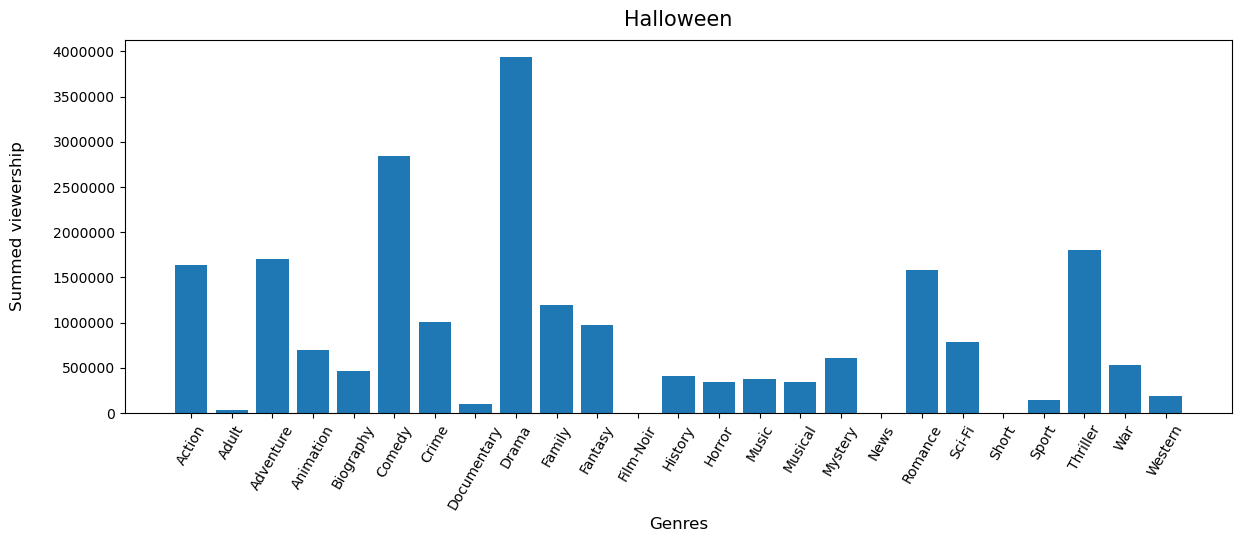

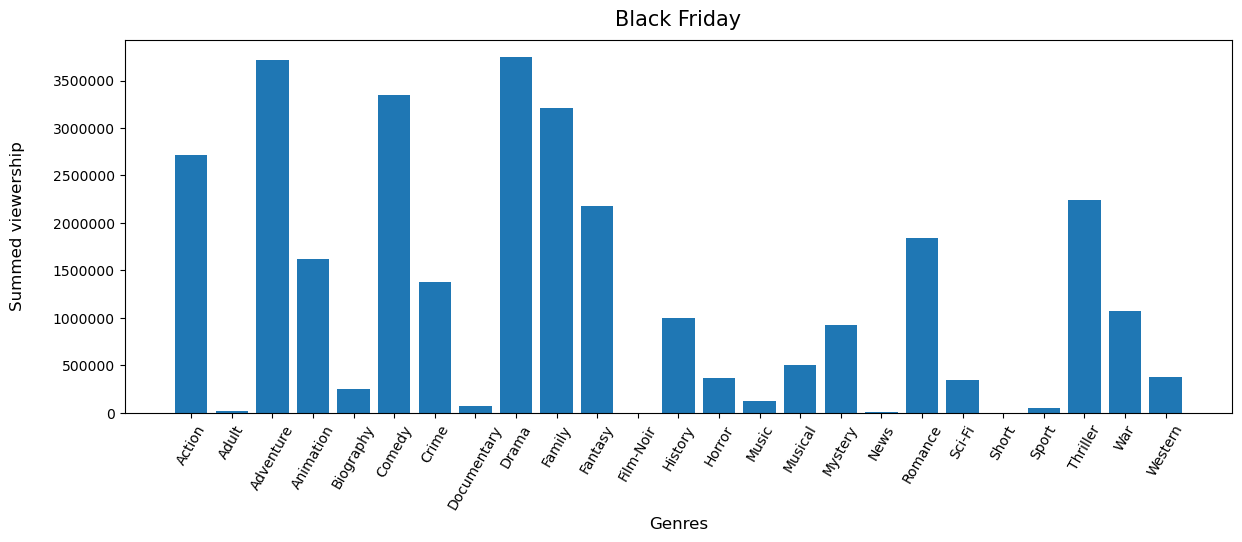

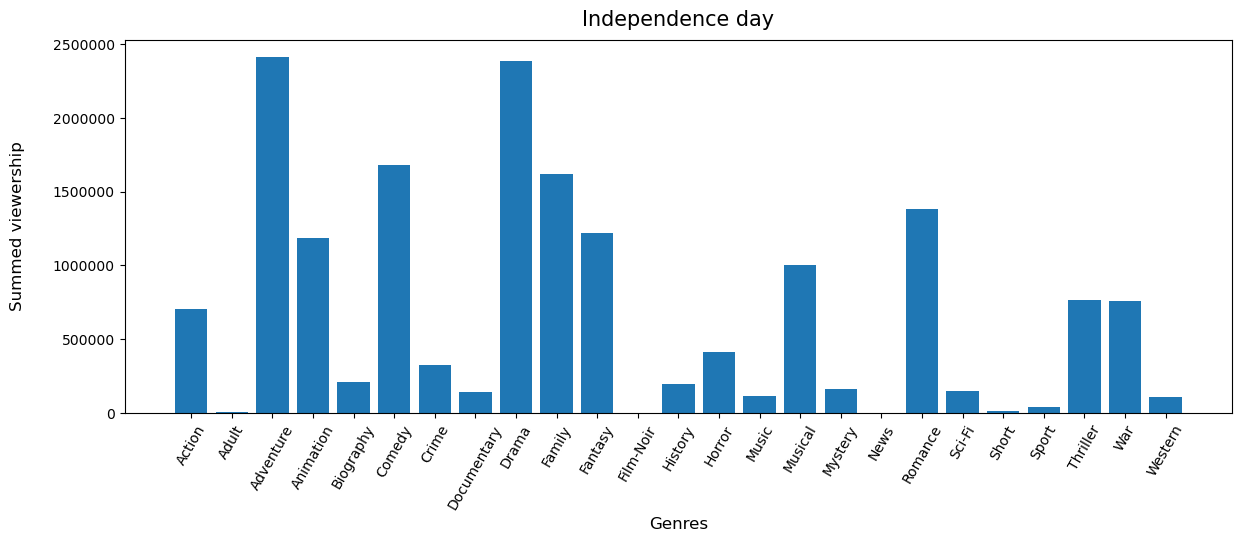

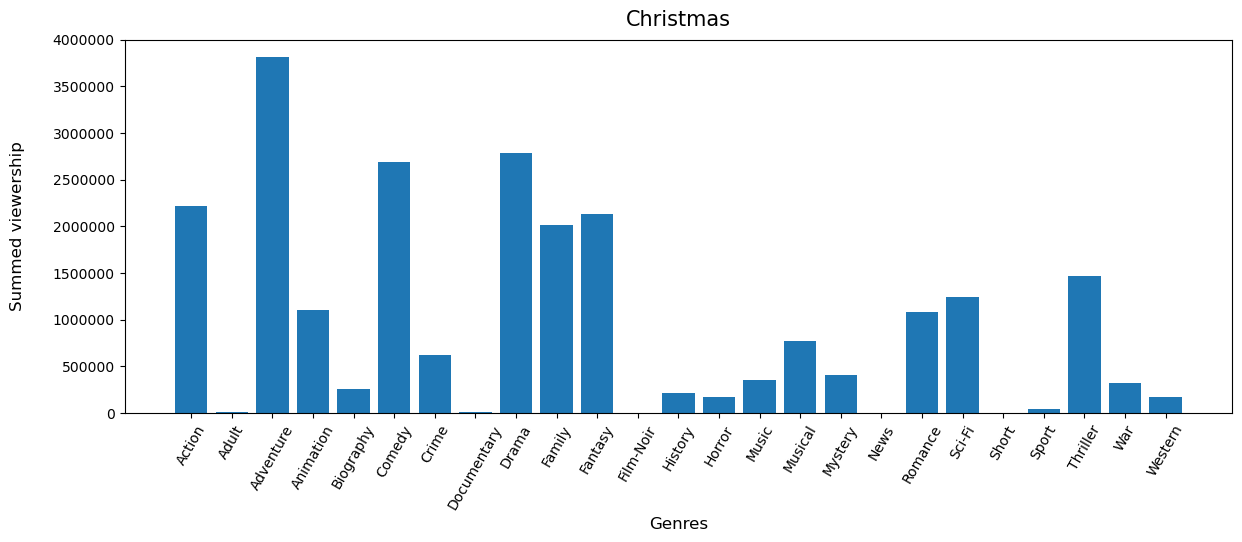

In [12]:
i = 0
fig, ax = plt.subplots(9,1)
fig.set_figheight(50)
fig.set_figwidth(15)
fig.tight_layout(pad=10.0)
seasons_dict = {'NY':"New Year's eve", 'VD':"Valentine's day", 'MD':'May day (vappu)', 'MS':'Midsummer', 'BS':'Back to school', 'HL':'Halloween', 'BF':'Black Friday', 'ID':'Independence day', 'CH':'Christmas'}

for season in seasons:

    df1 = df.loc[df['Season'] == season]
    summat = []

    for genre in genres:
        summat.append(df1.loc[df[genre] == 1, 'Katsojat'].sum()) 

    fig2, ax2 = plt.subplots(1,1,figsize=(15,8))

    ax2.bar(genres, summat)
    ax2.set_xlabel('Genres', fontsize = 12)
    ax2.set_ylabel('Summed viewership', fontsize = 12, labelpad=20)
    ax2.set_title(seasons_dict[season], fontsize = 15, pad=10)
    ax2.set_xticklabels(genres, rotation=60)
    ax2.set_yticklabels(range(0,6000000,500000))

    ax[i].bar(genres, summat)
    ax[i].set_xlabel('Genres', fontsize = 12)
    ax[i].set_ylabel('Summed viewership', fontsize = 12, labelpad=20)
    ax[i].set_title(seasons_dict[season], fontsize = 15, pad=10)
    ax[i].set_xticklabels(genres, rotation=60)

    i += 1
    fig2.tight_layout(pad=10)
    fig2.savefig(f'katsojasumma_{season}.png')

fig.savefig('katsojasumma_genret.png')